<a href="https://colab.research.google.com/github/abi672003/-Sentiment-Analysis-Using-an-unsupervised-learning-approach/blob/main/Mini_Project_52.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Loading libraries
import numpy as np # provides a high-performance multidimensional array and tools for its manipulation
import pandas as pd # for data munging, it contains manipulation tools designed to make data analysis fast and easy
import re # Regular Expressions - useful for extracting information from text
import nltk # Natural Language Tool Kit for symbolic and statistical natural language processing
import spacy # processing and understanding large volumes of text
import string # String module contains some constants, utility function, and classes for string manipulation
import re

# For viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.options.mode.chained_assignment = None

In [2]:
#Loading File
df = pd.read_csv('/content/Corona_tweets.csv',encoding='latin1')

VADER Sentiment Analysis

In [5]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.2 MB/s eta 0:00:00


In [6]:
import vaderSentiment
# calling SentimentIntensityAnalyzer object
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [7]:
# Using polarity scores for knowing the polarity of each text
def sentiment_analyzer_score(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [8]:
#testing the function
tweet  = "I would love to watch the magic show again"
tweet2 = "What the hell they have made. Pathetic!"
tweet3 = " I do not know what to do"
print (sentiment_analyzer_score(tweet))
print (sentiment_analyzer_score(tweet2))
print (sentiment_analyzer_score(tweet3))

I would love to watch the magic show again {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.6369}
None
What the hell they have made. Pathetic!- {'neg': 0.632, 'neu': 0.368, 'pos': 0.0, 'compound': -0.8622}
None
 I do not know what to do--------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
None


In [9]:
tweet  = "I like the fact that monsoon is over"
tweet2 = "I LIKE the fact that monsoon is over"

In [10]:
print (sentiment_analyzer_score(tweet))
print (sentiment_analyzer_score(tweet2))

I like the fact that monsoon is over---- {'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.3612}
None
I LIKE the fact that monsoon is over---- {'neg': 0.0, 'neu': 0.684, 'pos': 0.316, 'compound': 0.4995}
None


In [11]:
tweet  = "What is wrong with you"
tweet2  = "What is wrong with you?"
tweet3 = "What is wrong with you??"

In [12]:
print (sentiment_analyzer_score(tweet))
print (sentiment_analyzer_score(tweet2))
print (sentiment_analyzer_score(tweet3))

What is wrong with you------------------ {'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'compound': -0.4767}
None
What is wrong with you?----------------- {'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'compound': -0.4767}
None
What is wrong with you??---------------- {'neg': 0.464, 'neu': 0.536, 'pos': 0.0, 'compound': -0.5362}
None


In [13]:
tweet  = "He is good but his mother is irritating"
tweet2 = "The thai curry was bad, however pasta was delicious"
tweet3 = "The thai curry was ok and pasta was delicious"

In [14]:
print (sentiment_analyzer_score(tweet))
print (sentiment_analyzer_score(tweet2))
print (sentiment_analyzer_score(tweet3))

He is good but his mother is irritating- {'neg': 0.335, 'neu': 0.502, 'pos': 0.163, 'compound': -0.4678}
None
The thai curry was bad, however pasta was delicious {'neg': 0.246, 'neu': 0.493, 'pos': 0.261, 'compound': 0.0516}
None
The thai curry was ok and pasta was delicious {'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'compound': 0.7096}
None


In [15]:
tweet = "Real Madrid's game play was good last night."
tweet2 = "Real Madrid's game play was extremely good last night."
tweet3 = "Real Madrid's game play was somewhat good last night."
tweet4 = "Real Madrid's game play was terrible last night."
tweet5 = "Real Madrid's game play was awfully terrible last night."

In [16]:
print (sentiment_analyzer_score(tweet))
print (sentiment_analyzer_score(tweet2))
print (sentiment_analyzer_score(tweet3))
print (sentiment_analyzer_score(tweet4))
print (sentiment_analyzer_score(tweet5))

Real Madrid's game play was good last night. {'neg': 0.0, 'neu': 0.531, 'pos': 0.469, 'compound': 0.6486}
None
Real Madrid's game play was extremely good last night. {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.6801}
None
Real Madrid's game play was somewhat good last night. {'neg': 0.0, 'neu': 0.583, 'pos': 0.417, 'compound': 0.6133}
None
Real Madrid's game play was terrible last night. {'neg': 0.27, 'neu': 0.522, 'pos': 0.209, 'compound': -0.1779}
None
Real Madrid's game play was awfully terrible last night. {'neg': 0.265, 'neu': 0.547, 'pos': 0.188, 'compound': -0.2484}
None


In [17]:
tweet = " What a fine day I am having today"
tweet2 = " What a fine day I am having today :-)"
tweet3 = " What a fine day I am having today :-) :-)"

In [18]:
print (sentiment_analyzer_score(tweet))
print (sentiment_analyzer_score(tweet2))
print (sentiment_analyzer_score(tweet3))

 What a fine day I am having today------ {'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'compound': 0.2023}
None
 What a fine day I am having today :-)-- {'neg': 0.0, 'neu': 0.631, 'pos': 0.369, 'compound': 0.4767}
None
 What a fine day I am having today :-) :-) {'neg': 0.0, 'neu': 0.522, 'pos': 0.478, 'compound': 0.6597}
None


In [19]:
tweet = "I love the team and how they played last night"
tweet2 = "I love the team and how they played last night 💘"
tweet3 = "I love the team and how they played last night 😁"

In [20]:
print (sentiment_analyzer_score(tweet))
print (sentiment_analyzer_score(tweet2))
print (sentiment_analyzer_score(tweet3))

I love the team and how they played last night {'neg': 0.0, 'neu': 0.548, 'pos': 0.452, 'compound': 0.765}
None
I love the team and how they played last night 💘 {'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'compound': 0.8957}
None
I love the team and how they played last night 😁 {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'compound': 0.8625}
None


In [21]:
tweet = "I am laughing like crazy"
tweet2 = "I am laughing like crazy lmao"
tweet3 = "I am laughing like crazy lol"

In [22]:
print (sentiment_analyzer_score(tweet))
print (sentiment_analyzer_score(tweet2))
print (sentiment_analyzer_score(tweet3))

I am laughing like crazy---------------- {'neg': 0.238, 'neu': 0.198, 'pos': 0.564, 'compound': 0.5106}
None
I am laughing like crazy lmao----------- {'neg': 0.171, 'neu': 0.143, 'pos': 0.686, 'compound': 0.802}
None
I am laughing like crazy lol------------ {'neg': 0.186, 'neu': 0.155, 'pos': 0.659, 'compound': 0.7269}
None


In [23]:
tweet = "He wasn't very good at the play"
tweet2 = "He was not very good at the play"

In [24]:
print (sentiment_analyzer_score(tweet))
print (sentiment_analyzer_score(tweet2))

He wasn't very good at the play--------- {'neg': 0.262, 'neu': 0.499, 'pos': 0.239, 'compound': -0.0574}
None
He was not very good at the play-------- {'neg': 0.238, 'neu': 0.544, 'pos': 0.218, 'compound': -0.0574}
None


In [25]:
tweet = "He is kinda bored"
tweet2 = "He is friggin bored"

In [26]:
print (sentiment_analyzer_score(tweet))
print (sentiment_analyzer_score(tweet2))

He is kinda bored----------------------- {'neg': 0.376, 'neu': 0.624, 'pos': 0.0, 'compound': -0.204}
None
He is friggin bored--------------------- {'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'compound': -0.3384}
None


Data Preprocessing

In [27]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
words_descriptions = df['text'].apply(tokenizer.tokenize)
words_descriptions.head()

0    [MeNyrbie, Phil_Gahan, Chrisitv, https, t, co,...
1    [advice, Talk, to, your, neighbours, family, t...
2    [Coronavirus, Australia, Woolworths, to, give,...
3    [My, food, stock, is, not, the, only, one, whi...
4    [Me, ready, to, go, at, supermarket, during, t...
Name: text, dtype: object

In [28]:
all_words = [word for tokens in words_descriptions for word in tokens]
df['description_lengths']= [len(tokens) for tokens in words_descriptions]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))

1355318 words total, with a vocabulary size of 93958


In [29]:
# Checking most common words
from collections import Counter
count_all_words = Counter(all_words)
count_all_words.most_common(100)

[('the', 40443),
 ('to', 37569),
 ('t', 29328),
 ('co', 24055),
 ('https', 24007),
 ('and', 23283),
 ('of', 21318),
 ('a', 18073),
 ('in', 17997),
 ('coronavirus', 14237),
 ('for', 13408),
 ('19', 12597),
 ('is', 11706),
 ('are', 10890),
 ('I', 9639),
 ('on', 9130),
 ('COVID', 8529),
 ('you', 8444),
 ('s', 7814),
 ('at', 7455),
 ('prices', 7300),
 ('store', 6538),
 ('this', 6255),
 ('supermarket', 6210),
 ('food', 6201),
 ('that', 6133),
 ('with', 6041),
 ('have', 5914),
 ('grocery', 5481),
 ('be', 5431),
 ('as', 5241),
 ('it', 5225),
 ('amp', 5196),
 ('from', 5005),
 ('people', 4875),
 ('all', 4331),
 ('your', 4302),
 ('we', 4232),
 ('The', 4199),
 ('will', 4197),
 ('not', 3904),
 ('can', 3815),
 ('out', 3724),
 ('up', 3701),
 ('has', 3700),
 ('by', 3593),
 ('or', 3571),
 ('our', 3533),
 ('COVID19', 3419),
 ('Â', 3360),
 ('my', 3318),
 ('shopping', 3295),
 ('more', 3270),
 ('they', 3209),
 ('consumer', 3197),
 ('Coronavirus', 3168),
 ('their', 3147),
 ('online', 2969),
 ('during', 290

In [30]:
#### 1-gram tokenizer
example = 'The quick brown fox jumps over the lazy dog.'

# remove the dots and make all words lower case
clean_example = re.sub(r'\.', '', example)
print(clean_example.split())

['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']


In [31]:
# 2-gram tokenizer

example = 'The quick brown fox jumps over the lazy dog.'

without_first = example.split()[1:]
without_last = example.split()[:-1]

list(zip(without_last, without_first))

[('The', 'quick'),
 ('quick', 'brown'),
 ('brown', 'fox'),
 ('fox', 'jumps'),
 ('jumps', 'over'),
 ('over', 'the'),
 ('the', 'lazy'),
 ('lazy', 'dog.')]

Model

In [32]:
print (sentiment_analyzer_score(tweet2))

He is friggin bored--------------------- {'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'compound': -0.3384}
None


In [33]:
df['scores'] = df['text'].apply(lambda review: analyser.polarity_scores(review))

df.head()

,User_name,Time,Location,text,description_lengths,scores
0,1,16-03-2020,London,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,17,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,2,16-03-2020,UK,advice Talk to your neighbours family to excha...,38,"{'neg': 0.0, 'neu': 0.923, 'pos': 0.077, 'comp..."
2,3,16-03-2020,Vagabonds,Coronavirus Australia: Woolworths to give elde...,18,"{'neg': 0.0, 'neu': 0.812, 'pos': 0.188, 'comp..."
3,4,16-03-2020,NaN,My food stock is not the only one which is emp...,46,"{'neg': 0.036, 'neu': 0.744, 'pos': 0.22, 'com..."
4,5,16-03-2020,NaN,"Me, ready to go at supermarket during the #COV...",45,"{'neg': 0.126, 'neu': 0.677, 'pos': 0.197, 'co..."


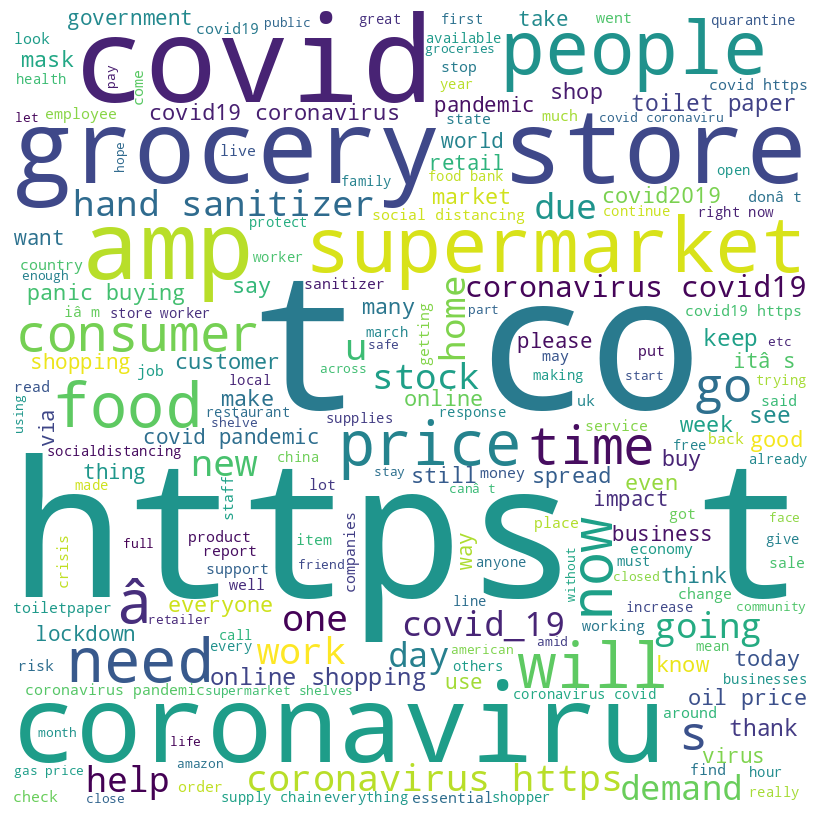

In [38]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.text:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()